In [2]:
import pandas as pd

/var/folders/1m/71syl3xd3910y8gqrq29f4w40000gn/T/ipykernel_825/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Load the new dataset
file_path = '../Datasets/tag00044_page_linear.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the new dataset
df.head()


,DATAFLOW,LAST UPDATE,freq,unit,meatitem,meat,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TAG00044(1.0),02/04/24 23:00:00,A,THS_T,SL,B1000,DE,2012,1140.0,NaN
1,ESTAT:TAG00044(1.0),02/04/24 23:00:00,A,THS_T,SL,B1000,DE,2013,1106.0,NaN
2,ESTAT:TAG00044(1.0),02/04/24 23:00:00,A,THS_T,SL,B1000,DE,2014,1128.0,NaN
3,ESTAT:TAG00044(1.0),02/04/24 23:00:00,A,THS_T,SL,B1000,DE,2015,1124.0,NaN
4,ESTAT:TAG00044(1.0),02/04/24 23:00:00,A,THS_T,SL,B1000,DE,2016,1148.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     60 non-null     object 
 1   LAST UPDATE  60 non-null     object 
 2   freq         60 non-null     object 
 3   unit         60 non-null     object 
 4   meatitem     60 non-null     object 
 5   meat         60 non-null     object 
 6   geo          60 non-null     object 
 7   TIME_PERIOD  60 non-null     int64  
 8   OBS_VALUE    60 non-null     float64
 9   OBS_FLAG     12 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.8+ KB


In [5]:
# List of columns to remove
columns_to_remove = ['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'meatitem', 'meat', 'OBS_FLAG']

# Remove the specified columns
df = df.drop(columns=columns_to_remove)

In [6]:
df

,geo,TIME_PERIOD,OBS_VALUE
0,DE,2012,1140.00
1,DE,2013,1106.00
2,DE,2014,1128.00
3,DE,2015,1124.00
4,DE,2016,1148.00
5,DE,2017,1124.00
6,DE,2018,1102.00
7,DE,2019,1106.00
8,DE,2020,1090.00
9,DE,2021,1072.02


In [7]:
#!pip install pycountry
import pycountry

# Function to convert country code to country name
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return code

# Apply the function to the 'geo' column
df['geo'] = df['geo'].apply(get_country_name)

# Display the first few rows of the updated dataset
print(df.head())

       geo  TIME_PERIOD  OBS_VALUE
0  Germany         2012     1140.0
1  Germany         2013     1106.0
2  Germany         2014     1128.0
3  Germany         2015     1124.0
4  Germany         2016     1148.0


In [8]:
# Pivot the table
pivoted_data = df.pivot(index='TIME_PERIOD', columns='geo', values='OBS_VALUE')

# Display the first few rows of the pivoted table
pivoted_data

geo,France,Germany,Ireland,Italy,Spain
TIME_PERIOD,,,,,
2012,1477.69,1140.00,495.40,981.12,591.38
2013,1404.49,1106.00,517.57,855.32,580.84
2014,1419.16,1128.00,581.81,709.43,578.60
2015,1452.77,1124.00,564.14,788.28,626.10
2016,1464.15,1148.00,588.36,809.66,637.01
2017,1442.18,1124.00,617.02,756.42,643.86
2018,1460.00,1102.00,622.54,809.22,669.01
2019,1428.46,1106.00,619.80,779.82,695.17
2020,1434.59,1090.00,633.38,732.28,677.74


In [9]:
pivoted_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2012 to 2023
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   France   12 non-null     float64
 1   Germany  12 non-null     float64
 2   Ireland  12 non-null     float64
 3   Italy    12 non-null     float64
 4   Spain    12 non-null     float64
dtypes: float64(5)
memory usage: 576.0 bytes


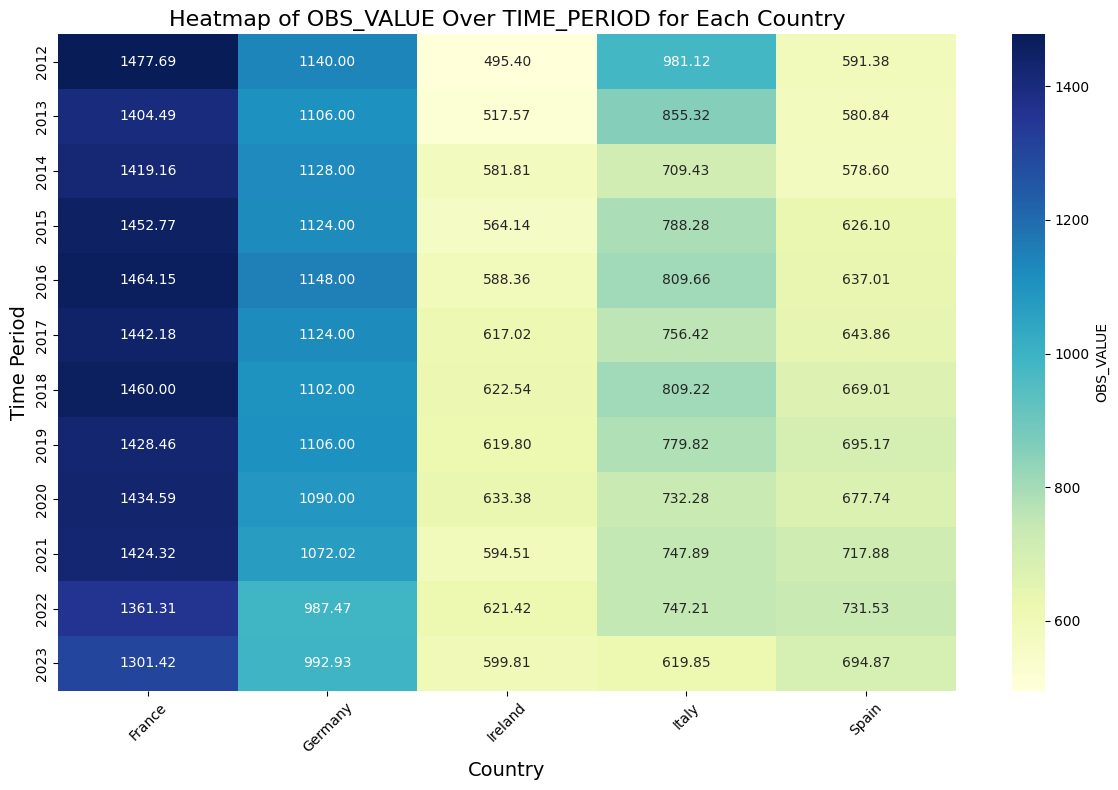

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap to visualize the OBS_VALUE for each country over time
plt.figure(figsize=(12, 8))
sns.heatmap(pivoted_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'OBS_VALUE'})

# Set the plot title and labels
plt.title('Heatmap of OBS_VALUE Over TIME_PERIOD for Each Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Time Period', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

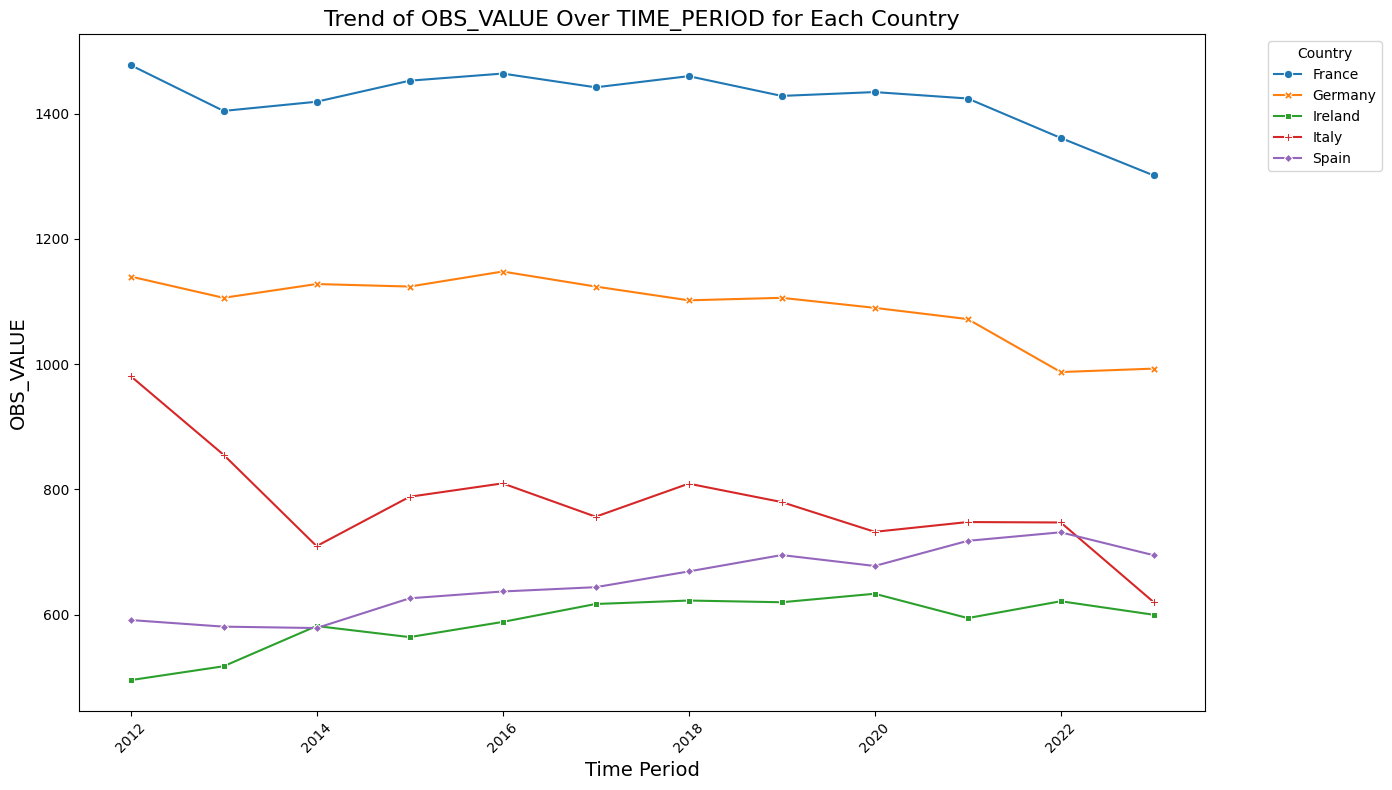

In [11]:

# Create a line plot for each country to show the trend over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=pivoted_data, markers=True, dashes=False)

# Set the plot title and labels
plt.title('Trend of OBS_VALUE Over TIME_PERIOD for Each Country', fontsize=16)
plt.xlabel('Time Period', fontsize=14)
plt.ylabel('OBS_VALUE', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


1. Hypothesis Testing (t-test)
Let's perform a t-test to compare the mean OBS_VALUE of two countries, say Ireland and Italy.

In [13]:
from scipy.stats import ttest_ind

# Perform a t-test
t_stat, p_value = ttest_ind(pivoted_data['Ireland'], pivoted_data['Italy'])

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -6.771400780180251, P-value: 8.356977459416015e-07


2. ANOVA (Analysis of Variance)
Let's use ANOVA to compare the means of OBS_VALUE across multiple countries.

In [15]:
from scipy.stats import f_oneway

# Perform ANOVA
f_stat, p_value = f_oneway(pivoted_data['France'], pivoted_data['Germany'], pivoted_data['Ireland'], pivoted_data['Italy'], pivoted_data['Spain'])

print(f"F-statistic: {f_stat}, P-value: {p_value}")


F-statistic: 416.94589520630393, P-value: 2.0178325362411214e-40


3. Chi-Square Test
Chi-square tests are typically used for categorical data, but we can still demonstrate its use with a hypothetical contingency table. Assume we want to see if there's a significant difference in OBS_VALUE counts over specific ranges for Ireland and Italy.

In [18]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(pd.cut(pivoted_data['Ireland'], bins=5), pd.cut(pivoted_data['Italy'], bins=5))

# Perform Chi-Square test
chi2_stat, p_value, dof, ex = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2_stat}, P-value: {p_value}, Degrees of freedom: {dof}")


Chi2 Statistic: 15.870000000000001, P-value: 0.1972631256239386, Degrees of freedom: 12


4. Correlation Analysis
Let's calculate the Pearson correlation coefficient between OBS_VALUE of Ireland and Italy.

In [19]:
# Calculate Pearson correlation
correlation = pivoted_data['Ireland'].corr(pivoted_data['Italy'])

print(f"Pearson Correlation: {correlation}")


Pearson Correlation: -0.693628327889549


5. Regression Analysis
Let's perform a simple linear regression analysis where we predict the OBS_VALUE of Ireland based on the OBS_VALUE of Italy.

In [20]:
import statsmodels.api as sm

# Define the independent variable (France) and the dependent variable (Germany)
X = pivoted_data['Ireland']
y = pivoted_data['Italy']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the regression results summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Italy   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     9.272
Date:                Fri, 17 May 2024   Prob (F-statistic):             0.0124
Time:                        10:26:35   Log-Likelihood:                -66.173
No. Observations:                  12   AIC:                             136.3
Df Residuals:                      10   BIC:                             137.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1599.9320    270.578      5.913      0.0

/Users/ricardo/.pyenv/versions/3.9.16/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  k, _ = kurtosistest(a, axis)
